## Fake News Detection
Fake news denotes a type of yellow press which intentionally presents misinformation or hoaxes spreading through both traditional print news media and recent online social media. In recent years, due to the booming developments of online social networks, fake news for various commercial and political purposes has been appearing in large numbers and widespread in the online world. With deceptive words, online social network users can get infected by these online fake news easily, which has brought about tremendous effects on the offline society already.

So, it is important to detect fake and real news.

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#Load the data
data=pd.read_csv('../input/textdb3/fake_or_real_news.csv')
data.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [3]:
#Shape of data
data.shape

(6335, 4)

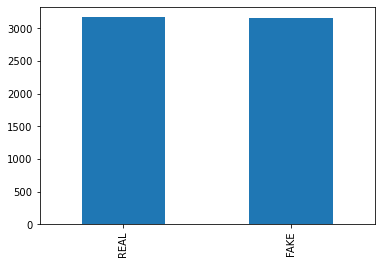

In [4]:
data.label.value_counts().plot.bar()

In [5]:
#Split the data
x_train,x_test,y_train,y_test=train_test_split(data['text'],data['label'],test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(5068,)
(1267,)
(5068,)
(1267,)


## TfidfVectorizer
The TfidfVectorizer converts a collection of raw documents into a matrix of TF-IDF features.

TF (Term Frequency):
The number of times a word appears in a document is its Term Frequency. A higher value means a term appears more often than others, and so, the document is a good match when the term is part of the search terms.

IDF (Inverse Document Frequency):
Words that occur many times a document, but also occur many times in many others, may be irrelevant. IDF is a measure of how significant a term is in the entire corpus.

In [6]:
tf=TfidfVectorizer(stop_words='english',max_df=0.8)
x_train=tf.fit_transform(x_train)
x_test=tf.transform(x_test)

In [7]:
print(x_train.shape)
print(x_test.shape)

(5068, 60360)
(1267, 60360)


## Fitting the model
We have to build a model to accurately classify a piece of news as REAL or FAKE.

We have used six models PassiveAggressiveClassifier, MutinomialNB, DecisionTreeClassifier, RandomForestClassifier, SVC, LogisticRegression so as to compare the accuracy of these models. It will help us to find which model fits the data and predict real and fake news accurately.



In [8]:
model1=PassiveAggressiveClassifier(max_iter=300)
model1.fit(x_train,y_train)
model2=MultinomialNB()
model2.fit(x_train,y_train)
model3=DecisionTreeClassifier()
model3.fit(x_train,y_train)
model4=RandomForestClassifier()
model4.fit(x_train,y_train)
model5=SVC()
model5.fit(x_train,y_train)
model6=LogisticRegression(random_state=0)
model6.fit(x_train,y_train)

LogisticRegression(random_state=0)

## Predict the test data

In [9]:
ypred1=model1.predict(x_test)
ypred2=model2.predict(x_test)
ypred3=model3.predict(x_test)
ypred4=model4.predict(x_test)
ypred5=model5.predict(x_test)
ypred6=model6.predict(x_test)

In [10]:
# Claculate the accuracy_score

acc1=accuracy_score(y_test,ypred1)
acc2=accuracy_score(y_test,ypred2)
acc3=accuracy_score(y_test,ypred3)
acc4=accuracy_score(y_test,ypred4)
acc5=accuracy_score(y_test,ypred5)
acc6=accuracy_score(y_test,ypred6)

In [11]:
labels={'PassiveAggressiveClassifier':acc1,"MultinomialNB":acc2,"DecisionTreeClassifier":acc3,
       "RandomForestClassifier":acc4,"SVC":acc5,"LogisticRegression":acc6}
for model,accuracy in labels.items():
    print(str(model)+":"+str(accuracy))

PassiveAggressiveClassifier:0.9297553275453828
MultinomialNB:0.8224151539068666
DecisionTreeClassifier:0.823993685872139
RandomForestClassifier:0.9139700078926598
SVC:0.9281767955801105
LogisticRegression:0.9187056037884768


Text(0.5, 1.0, 'REAL NEWS')

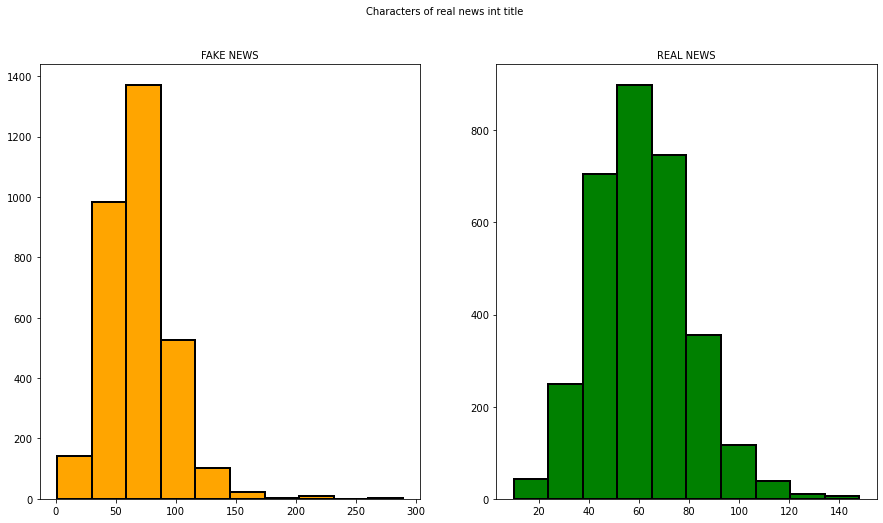

In [15]:
## Data visualization

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Characters of fake news in title',fontsize=20)
news_len=data[data['label']=="FAKE"]['title'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title('FAKE NEWS',fontsize=10)
plt.suptitle("Characters of real news int title",fontsize=10)
news_len2=data[data['label']=='REAL']['title'].str.len()
ax2.hist(news_len2,color='green',linewidth=2,edgecolor='black')
ax2.set_title('REAL NEWS',fontsize=10)


Text(0.5, 1.0, 'FAKE')

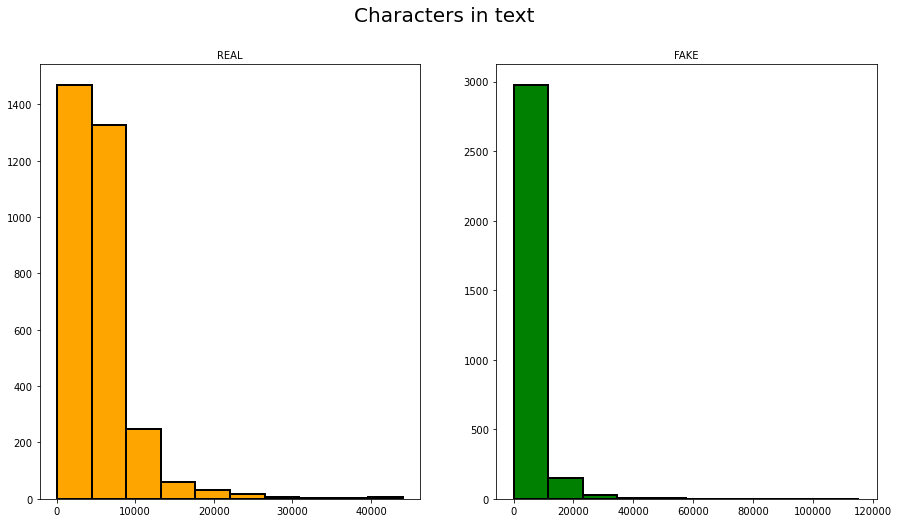

In [16]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
plt.suptitle('Characters in text',fontsize=20)
news_len=data[data['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='orange',linewidth=2,edgecolor='black')
ax1.set_title("REAL",fontsize=10)
news_len2=data[data['label']=='FAKE']['text'].str.len()
ax2.hist(news_len2,color='green',edgecolor='black',linewidth=2)
ax2.set_title('FAKE',fontsize=10)

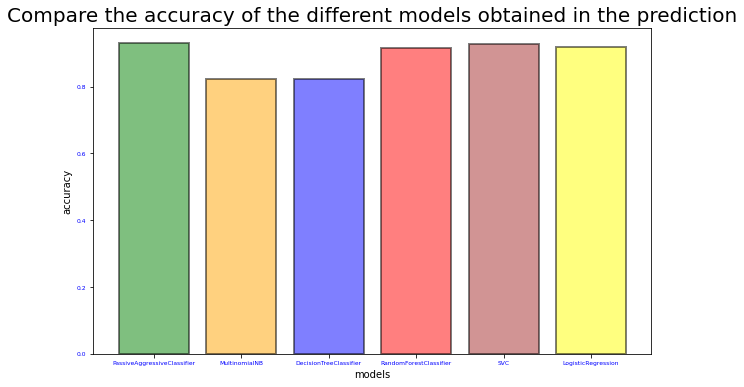

In [24]:
#Compare the accuracy

plt.figure(figsize=(10,6))
plt.title('Compare the accuracy of the different models obtained in the prediction',fontsize=20)
color=['green','orange','blue','red','brown','yellow']
plt.bar(labels.keys(),labels.values(),color=color,linewidth=2,edgecolor='black',alpha=0.5)
plt.xticks(color='blue',fontsize=6)
plt.yticks(color='blue',fontsize=6)
plt.xlabel('models')
plt.ylabel('accuracy')
plt.show()

In [25]:
#Confusion_maatrix
con1=confusion_matrix(y_test,ypred1)
con2=confusion_matrix(y_test,ypred2)
con3=confusion_matrix(y_test,ypred3)
con4=confusion_matrix(y_test,ypred4)
con5=confusion_matrix(y_test,ypred5)
con6=confusion_matrix(y_test,ypred6)

In [27]:
print('Confusion Matrix for PassiveAggressiveClassifier')
con1

Confusion Matrix for PassiveAggressiveClassifier


array([[613,  42],
       [ 47, 565]])

In [30]:
from mlxtend.plotting import plot_confusion_matrix

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb016b41290>)

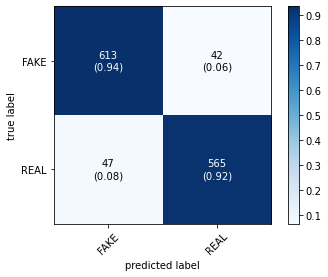

In [32]:
plot_confusion_matrix(conf_mat=con1,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

confusion_matrix for MultinomialNB model


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb0169e7c90>)

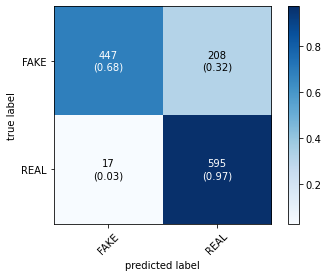

In [42]:
print("confusion_matrix for MultinomialNB model")
plot_confusion_matrix(conf_mat=con2,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion matrix for DecisionTreeClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb0167a96d0>)

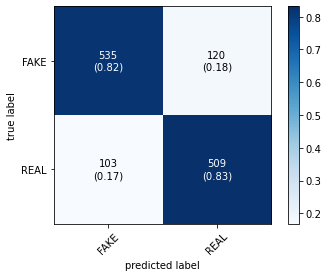

In [43]:
print('Confusion matrix for DecisionTreeClassifier')
plot_confusion_matrix(conf_mat=con3,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion matrix for RandomForestClassifier


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb0168a4610>)

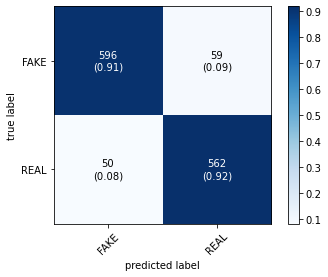

In [44]:
print('Confusion matrix for RandomForestClassifier')
plot_confusion_matrix(conf_mat=con4,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

Confusion matrix for SVC


(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb01670c090>)

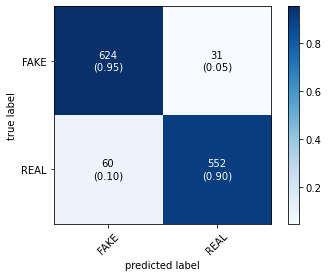

In [45]:
print('Confusion matrix for SVC')
plot_confusion_matrix(conf_mat=con5,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

In [46]:
print('Confusion_matrx for LogisticRegression')
plot_confusion_matrix(conf_mat=con6,show_absolute=True,
                                show_normed=True,
                                colorbar=True,class_names=['FAKE','REAL'])

SyntaxError: invalid syntax (<ipython-input-46-94d5d7afafb3>, line 2)